<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 타이타닉 연습 Part 2

* 본 코드는 이유한님의 타이타닉 튜토리얼 코드를 이해 및 암기하기 위한 목적으로 작성되었습니다.
* 출처 : https://kaggle-kr.tistory.com/18?category=868316

In [88]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. df_train, df_test이름으로 타이타닉 train, test 데이터셋을 저장하라
* /content/drive/MyDrive/Colab Notebooks/타이타닉/
2. SibSp, Parch 그리고 자기자신을 더한 Familysize 변수를 추가하라
3. Fare의 결측값을 평균으로 대체하라 (train, test 모두)
4. Fare값을 log를 취해 Fare변수로 저장하라(train, test 모두)

In [89]:
#1차 시도

In [193]:

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

for i in [df_train, df_test] :
  i['Familysize'] = i['SibSp'] + i['Parch']
  i['Fare'] = i['Fare'].mean()
  i['Fare'] = i['Fare'].map(lambda x : np.log(x) if x>0 else 0)
  

train, test 모두 Initial이라는 변수를 생성하여 Name변수에서 .전의 모든 문자를 가져와라. 정규식 : '([A-Za-z]+)\.'

In [194]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')


trian의 Initial변수와 성별의 교차표를 만들어라. 이때 행은 성별, 열은 inital이 들어가게 해라

In [195]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Initial의 값인 1을 2로 대응되게 바꾸는 코드를 작성해라. (train, test 모두)
* 1. ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona']
* 2. ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr']

In [196]:
for i in [df_train, df_test]:
  i['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],
                            inplace=True)


train의 Initial별 모든 열의 평균값을 구해라

In [197]:
df_train.groupby(df_train['Initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.472097,3.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.472097,1.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,3.472097,0.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.472097,1.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,3.472097,0.222222


train의 Initial별 Survived의 평균 막대그래프를 그려라

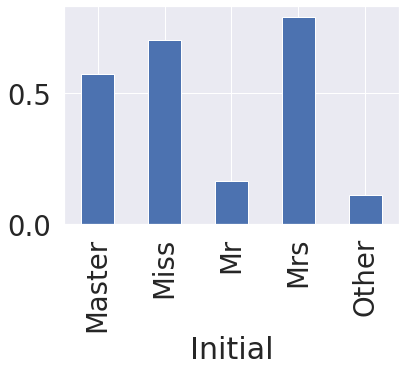

In [198]:
df_train.groupby(df_train['Initial'])['Survived'].mean().plot.bar()

train의 Initial을 이용해 각 Initial의 Age평균값을 Age Null값에 대체해라

test도 위의 과정으로 Age Null값을 대체하라

In [199]:
age_mean = df_train.groupby(['Initial'])['Age'].mean()

# null 값 채크
#df_train2.loc[df_train2['Age'].isnull()==True, 'Age'] # 5번째, 17번째 NaN임
#df_train2 = df_train.copy()
for d in [df_train, df_test] :
  for i, j in zip(age_mean, age_mean.index) :
    d.loc[(d.Initial ==j) & (d.Age.isnull()), 'Age'] = i


Train의 Embarked 변수의 최빈값을 구하고 이 최빈값으로 NUll을 대체하라

In [200]:
df_train.Embarked.mode() # S가 가장 많이 나옴

df_train.loc[df_train.Embarked.isnull(), 'Embarked'] ='S'

fillna 함수를 이용해서 위의 Embarked를 대체해라

In [201]:
df_train['Embarked'].fillna('S',inplace= True) # inplace 옵션을 False로 하면 원본 데이터에 영향없음


train, test셋에 Age_cat이라는 변수에 Age를 10살 간격으로 나누어 카테고리 변수를 생성해라

* hint : for문, range, array 속성을 이용해라

In [202]:
#df_test.Age.describe()
# train, test 모두 0~ 80세 사이임

a = [x for x in range(0,80,10)] # 10세 간격으로 0부터 100까지 값을 리스트로 바꿈
age_cate = (np.array(a) / 10)

for d in [df_train, df_test]:
  for i,j in zip(a,age_cate) :
    d.loc[(d.Age>=i) & (d.Age <(i+10)), 'Age_cat'] = j 
  d.loc[d.Age>=80, 'Age_cat'] = 7

In [203]:
age_cate

array([0., 1., 2., 3., 4., 5., 6., 7.])

위의과정과 결과가 같지만, apply를 이용해서 age를 10세 단위로 분류한 Age_cate2 변수를 만들어라

In [204]:
def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x <30 :
    return 2
  elif x <40:
    return 3
  elif x <50:
    return 4
  elif x <60:
    return 5
  elif x <70:
    return 6
  else :
    return 7

df_train['Age_cate_2'] = df_train['Age'].apply(category_age)

age를 10간격으로 바꾸는 방법을 두가지를 위에서 했었다. 이의 결과가 같은지 체크 해라.
* hint : all()메소드를 사용해라

In [205]:
# 일치하지 않은 경우 알아보기
df_train.loc[((df_train['Age_cat']) == df_train['Age_cate_2'])==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Initial,Age_cat,Age_cate_2


In [206]:
(df_train['Age_cat'] == df_train['Age_cate_2']).all()

True

Inital의 각 값을 수치에 대응시켜라
Master는 0 , Miss 1... 등등
* 예시와 동일하게 하기 위해 map을 이용해 노가다 해라
* map 관련 포스트 
  * https://coding-grandpa.tistory.com/entry/Lambda-Map
  * map에 딕셔너리를 넣을 경우 딕셔너리에 없는 값은 NaN으로 반환되니 주의해야 한다.

In [209]:
rep = {
    'Master':0, 'Miss':1, 'Mr':2,'Mrs':3,'Other':4
}

df_train['Initial2'] = df_train['Initial'].map(rep)
df_test['Initial2'] = df_test['Initial'].map(rep)



Embarked의 유니크한 값을 출력하고 이를 각각 1,2,3에 대응되게 바꾸어라

In [215]:
df_train['Embarked'].unique()

em = {
  'C':0, 'Q':1, 'S':2 
}

df_train['Embarked'] = df_train['Embarked'].map(em)
df_test['Embarked'] = df_test['Embarked'].map(em)

성별(Sex)
도 위의 과정을 거쳐 여자면 0, 남자면 1인 코드를 작성해라

In [217]:
sex_en = {
    'female':0, 'male':1
}

df_train['Sex'] = df_train['Sex'].map(sex_en)

피어슨 상관계수를 히트맵을 통해 그려라.
이때 0과 1로 코딩된 명목형 변수를 포함할 수 있다.
* 이유한님은 Initial을 상관계수 행렬에 포함시켰으나 이는 적절하지 않아보임.
* colormap = plt.cm.RdBu
* 반드시 히트맵위에 상관계수 값이 보이도록 할 것

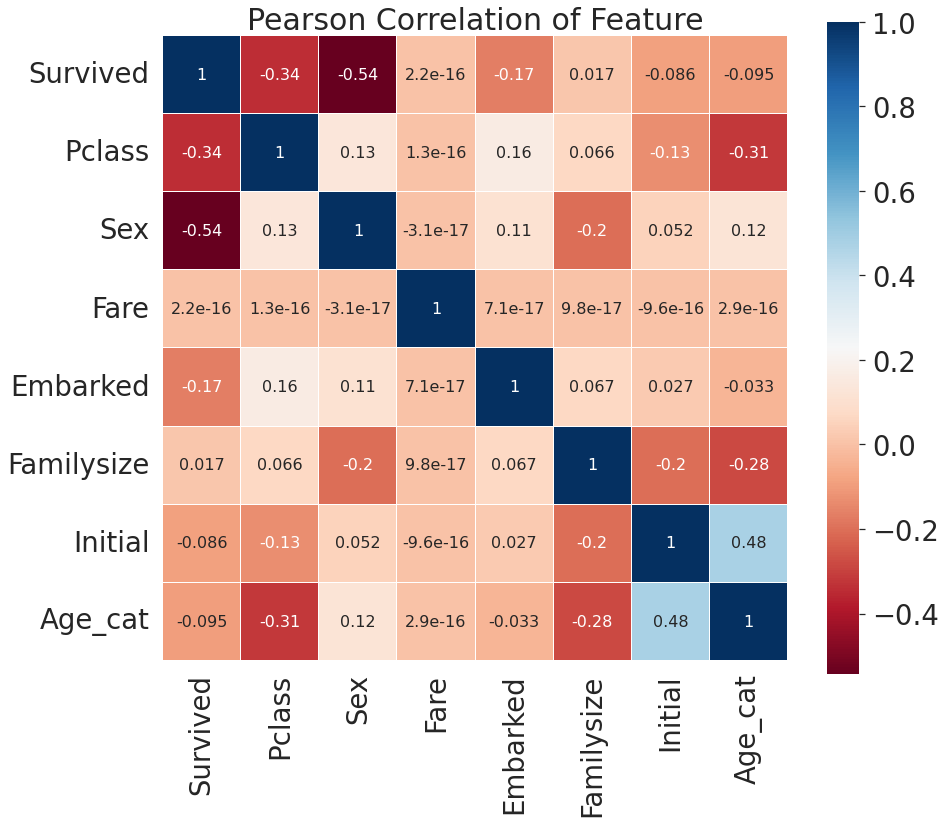

In [229]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','Familysize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), Linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={"size":16})
del heatmap_data

Initial, Embarked을 One-hot 인코딩하여라

In [236]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

* category가 100가 넘는 경우에는 학습시 버겁게 되 다른 방법을 사용한다.
> Frequency, Target Encoding

'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin' 변수를 제거하라

In [237]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [238]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Familysize,Age_cat,Age_cate_2,Initial2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,3.472097,1,2.0,2,NaN,0,0,1,0,0,0,0,1
1,1,1,0,38.0,3.472097,1,3.0,3,NaN,0,0,0,1,0,1,0,0
2,1,3,0,26.0,3.472097,0,2.0,2,NaN,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.472097,1,3.0,3,NaN,0,0,0,1,0,0,0,1
4,0,3,1,35.0,3.472097,0,3.0,3,NaN,0,0,1,0,0,0,0,1


### 머신러닝 빌드 하기